# Sneaker Stores in NYC

### Introduction/Business Problem

This final project explores the best locations for new sneaker and lifestyle stores throughout the streets of New York City. New York is a major metropolitan area with more than 8.4 million (Quick Facts, 2018) inhabitants. Its the largest city in the US with a long history of international immigration and style innovation for the whole world. As Jay-Z and Alicia Keys once put it, if you can make it here, you can make it everywhere. In 2017, the total global sneakers market was valued at approximately 62.5 billion U.S. dollars and was forecast to reach a value of 97.8 billion U.S. dollars by 2024. (https://www.statista.com/statistics/1017918/sneakers-market-value-forecast-worldwide/)

Since the competion is very high, the project aims to answer the question where are good locations to open a new sneaker store and what kind of target audience and clients can be expected. We also will try to answer the question if the store should be a classical retail store or a resell aka commission based to store.

### Data section

For this project we use the New Zork citz data used in the previous weeks. This contains the following:
1. New York City data that contains Borough, Neighborhoods along with there latitudes and longitudes
    - Data Source: https://cocl.us/new_york_dataset
    - Description: This data set contains the required information. And we will use this data set to explore various neighborhoods of new york city.


2. Sneaker and fashion retails store in Manhatten and Brooklyn (NYC).
    - Data Source: Foursquare API
    - Description: By using this API we will get all the venues in Queens neighborhood. We can filter these venues to get only Indian restaurants.

### Approach

Approach
Collect the new york city data from https://cocl.us/new_york_dataset
* Using Foursquare API we will get all venues for each neighborhood.
* Filter out all venues which are sneaker and fashion related.
* Data Visualization and some statistical analysis.
* Analysing using Clustering (Specially K-Means):
1. Find the best value of K
2. Visualize the neighborhood with number of Indian Restaurants.
* Compare the Neighborhoods to Find the Best Place for Starting up a Restaurant
* Inference From these Results and related Conclusions

### Libaries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Download Data

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Data downloaded!


### Transform to DataFrame

In [3]:
neighborhoods_data = newyork_data['features']
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


### Location Data

In [4]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


### Create a map of New York with neighborhoods superimposed on top.

In [5]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

### Foursqure Data

In [6]:
CLIENT_ID = 'I3LSPZJQ13UVYQPGCIABQUPMLL1HU35WL3Y3IU3AFSCVCSHO' # your Foursquare ID
CLIENT_SECRET = 'KT0WTE2HOIRPDYPFKPFACFZ5CF4QABRP400TY0O2ZXNYBVWR' # your Foursquare Secret
VERSION = '20200605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: I3LSPZJQ13UVYQPGCIABQUPMLL1HU35WL3Y3IU3AFSCVCSHO
CLIENT_SECRET:KT0WTE2HOIRPDYPFKPFACFZ5CF4QABRP400TY0O2ZXNYBVWR


### Process Manhatten Neighborhood Data

In [89]:
manhattan_data.loc[0, 'Neighborhood']
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value
neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

In [56]:
# type your answer here
LIMIT = 200 
radius = 500 

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [57]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

manhattan_onehot = manhattan_onehot[['Neighborhood','Shoe Store','Sporting Goods Shop','Bank']]

In [58]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped.head()

,Neighborhood,Shoe Store,Sporting Goods Shop,Bank
0,Battery Park City,0.000000,0.0,0.000000
1,Carnegie Hill,0.011494,0.0,0.011494
2,Central Harlem,0.000000,0.0,0.000000
3,Chelsea,0.010000,0.0,0.000000
4,Chinatown,0.010000,0.0,0.000000


### Some Clustering

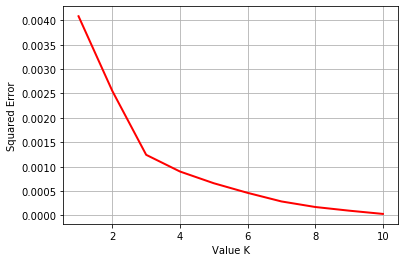

In [59]:
manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)
cost=[]
for i in range(1,11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(manhattan_grouped_clustering)
    cost.append(KM.inertia_)
    
plt.plot(range(1,11), cost, color='r', linewidth='2')
plt.xlabel('Value K')
plt.ylabel('Squared Error')
plt.grid()
plt.show()


From the above image we see that best value of K will be 3 according to Elbow method.

We will merge above table with our New York dataframe so that we will get coordinates of all neighborhoods.

In [60]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [61]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Battery Park City,Bank,Sporting Goods Shop,Shoe Store
1,Carnegie Hill,Bank,Shoe Store,Sporting Goods Shop
2,Central Harlem,Bank,Sporting Goods Shop,Shoe Store
3,Chelsea,Shoe Store,Bank,Sporting Goods Shop
4,Chinatown,Shoe Store,Bank,Sporting Goods Shop


In [62]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int32)

In [63]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
manhattan_merged = manhattan_data.copy()
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
manhattan_merged = manhattan_merged.join(manhattan_grouped.set_index('Neighborhood'), on='Neighborhood')
manhattan_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Shoe Store,Sporting Goods Shop,Bank
0,Manhattan,Marble Hill,40.876551,-73.910660,0,Bank,Sporting Goods Shop,Shoe Store,0.000000,0.000000,0.000000
1,Manhattan,Chinatown,40.715618,-73.994279,0,Shoe Store,Bank,Sporting Goods Shop,0.010000,0.000000,0.000000
2,Manhattan,Washington Heights,40.851903,-73.936900,2,Bank,Sporting Goods Shop,Shoe Store,0.011494,0.011494,0.022989
3,Manhattan,Inwood,40.867684,-73.921210,0,Bank,Sporting Goods Shop,Shoe Store,0.000000,0.000000,0.000000
4,Manhattan,Hamilton Heights,40.823604,-73.949688,2,Bank,Sporting Goods Shop,Shoe Store,0.000000,0.000000,0.016949


### Visualize the three clusters

In [64]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Analyze the Clusters

#### Cluster 0

In [65]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Shoe Store,Sporting Goods Shop,Bank
0,Marble Hill,Bank,Sporting Goods Shop,Shoe Store,0.000000,0.0,0.0
1,Chinatown,Shoe Store,Bank,Sporting Goods Shop,0.010000,0.0,0.0
3,Inwood,Bank,Sporting Goods Shop,Shoe Store,0.000000,0.0,0.0
6,Central Harlem,Bank,Sporting Goods Shop,Shoe Store,0.000000,0.0,0.0
7,East Harlem,Bank,Sporting Goods Shop,Shoe Store,0.000000,0.0,0.0
11,Roosevelt Island,Bank,Sporting Goods Shop,Shoe Store,0.000000,0.0,0.0
12,Upper West Side,Shoe Store,Bank,Sporting Goods Shop,0.011236,0.0,0.0
13,Lincoln Square,Bank,Sporting Goods Shop,Shoe Store,0.000000,0.0,0.0
16,Murray Hill,Bank,Sporting Goods Shop,Shoe Store,0.000000,0.0,0.0
17,Chelsea,Shoe Store,Bank,Sporting Goods Shop,0.010000,0.0,0.0


#### Cluster 1

In [66]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Shoe Store,Sporting Goods Shop,Bank
10,Lenox Hill,Sporting Goods Shop,Bank,Shoe Store,0.00,0.02,0.0
14,Clinton,Sporting Goods Shop,Bank,Shoe Store,0.00,0.01,0.0
15,Midtown,Sporting Goods Shop,Shoe Store,Bank,0.01,0.02,0.0
23,Soho,Sporting Goods Shop,Bank,Shoe Store,0.00,0.01,0.0
32,Civic Center,Sporting Goods Shop,Bank,Shoe Store,0.00,0.02,0.0
38,Flatiron,Sporting Goods Shop,Bank,Shoe Store,0.00,0.02,0.0


#### Cluster 2

In [67]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Shoe Store,Sporting Goods Shop,Bank
2,Washington Heights,Bank,Sporting Goods Shop,Shoe Store,0.011494,0.011494,0.022989
4,Hamilton Heights,Bank,Sporting Goods Shop,Shoe Store,0.000000,0.000000,0.016949
5,Manhattanville,Bank,Sporting Goods Shop,Shoe Store,0.000000,0.000000,0.023810
8,Upper East Side,Bank,Shoe Store,Sporting Goods Shop,0.011236,0.000000,0.011236
9,Yorkville,Bank,Sporting Goods Shop,Shoe Store,0.000000,0.000000,0.010000
27,Gramercy,Bank,Sporting Goods Shop,Shoe Store,0.000000,0.000000,0.011364
30,Carnegie Hill,Bank,Shoe Store,Sporting Goods Shop,0.011494,0.000000,0.011494
34,Sutton Place,Bank,Sporting Goods Shop,Shoe Store,0.000000,0.010000,0.010000
35,Turtle Bay,Bank,Sporting Goods Shop,Shoe Store,0.000000,0.000000,0.010000
36,Tudor City,Bank,Sporting Goods Shop,Shoe Store,0.000000,0.000000,0.013158


#### Some plotting

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


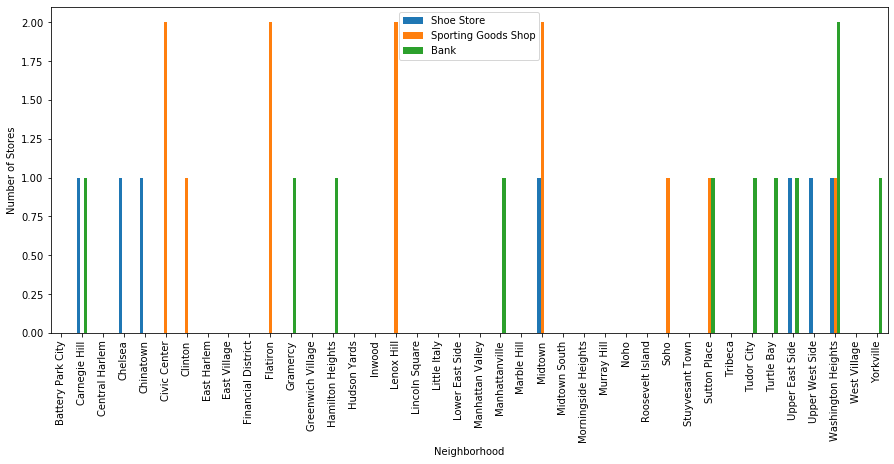

In [68]:
graph = pd.DataFrame(manhattan_onehot.groupby('Neighborhood')['Shoe Store','Sporting Goods Shop','Bank'].sum())
#graph = graph.sort_values(by='Shoe Store', ascending=False)
graph.plot(kind='bar',figsize=(15,6))
plt.xlabel('Neighborhood')
plt.ylabel('Number of Stores')
plt.show()

In the above picture we see that 
* not all neighborhoods have a sneaker or shoe store or a bank
* Midtown with a one shoe and two sporting shops has the most amount of shops
* Washington Heights has the most number of banks

In [ ]:
### Results

In [ ]:
The results of the exploratory data analysis and clustering is summarized below :
1. Midtown has the highest density of  sneaker shops
2. Washington Heights has the most number of banks
3. Cluster 0 neighborhoods have the least number of shoe shops
4. Opening a restaurant would most likely be a good idea in a neighborhood with a lot of banks and many clients and not so many shoe shops, for example Upper East side

### Discussion

It is hard to tell where to open a sneaker shop. The data provides a first glimpse. But some more correlation analysis would be required to figure out the ideal location. 

Some drawbacks of analysis are: the clustering is completely based on the data provided by Foursquare API. Since land price, the distance of venues from the closest station, the number of potential customers, could all play a major role and thus, this analysis is definitely far from being conclusory. However, it definitely gives us some very important preliminary information on the possibilities of opening a high fashion and sneaker store in Manhattan.

### Conlcusion and Course Remarks

To conclude this project, I liek to comment of the nature of such a real-life data science project. We applied some frequently used python libraries to handle JSON file, plotting graphs, and other exploratory data analysis. Using the Foursquare API to major boroughs of New York City and the neighborhoods in Manhattan. This is suitable for real-life business problems. Also, some of the drawbacks and chances for improvements to represent even more realistic pictures are mentioned. As a final note, all of the above analyses is depended on the adequacy and accuracy of Foursquare data. A more comprehensive analysis and future work would need to incorporate data from other external databases.